# CS 4650 - Capstone Project

### Jeremy Embar, Timothy Huang, Michael Left, Dante Martinez
### Cal Poly Pomona 2023-05-11

Some description of the project.

### Necessary imports and settings

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import sklearn as sk
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
import matplotlib.cm as cm

pd.set_option('display.max_columns', 50);
np.set_printoptions(precision=4, suppress=True)

### Loading the data
Loading the data for both men and women into dataframes.

In [3]:
data_m = pd.read_csv('Mens_Boston_Marathon_Winners.csv')
data_f = pd.read_csv('Womens_Boston_Marathon_Winners.csv')

In [4]:
data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              124 non-null    float64
 1   Winner            124 non-null    object 
 2   Country           124 non-null    object 
 3   Time              124 non-null    object 
 4   Distance (Miles)  124 non-null    float64
 5   Distance (KM)     124 non-null    float64
dtypes: float64(3), object(3)
memory usage: 6.0+ KB


In [5]:
data_m.tail()

,Year,Winner,Country,Time,Distance (Miles),Distance (KM)
121,2018.0,Yuki Kawauchi,Japan,02:15:58,26.2,42.2
122,2019.0,Lawrence Cherono,Kenya,02:07:57,26.2,42.2
123,NaN,NaN,NaN,NaN,NaN,NaN
124,2021.0,Benson Kipruto,Kenya,02:09:51,26.2,42.2
125,2022.0,Evans Chebet,Kenya,02:06:51,26.2,42.2


Checking for NaN values and dropping the rows that are missing.

In [6]:
data_m['Year'].isna().sum()

2

In [7]:
data_f['Year'].isna().sum()

1

Dropping all the NaN values from the Men and Womens marathon tables.

In [8]:
data_m=data_m.dropna();
data_f=data_f.dropna();

Creating a new column for Speed (MPH) and calculating those values

In [9]:
data_m['Speed (MPH)'] = pd.to_datetime(data_m['Time'], format= '%H:%M:%S');
data_m['Speed (MPH)'] = data_m['Speed (MPH)'].dt.hour + data_m['Speed (MPH)'].dt.minute/60 + data_m['Speed (MPH)'].dt.second/3600;
data_m['Speed (MPH)'] = data_m['Distance (Miles)'] / data_m['Speed (MPH)'];

In [10]:
data_f['Speed (MPH)'] = pd.to_datetime(data_f['Time'], format= '%H:%M:%S');
data_f['Speed (MPH)'] = data_f['Speed (MPH)'].dt.hour + data_f['Speed (MPH)'].dt.minute/60 + data_f['Speed (MPH)'].dt.second/3600;
data_f['Speed (MPH)'] = data_f['Distance (Miles)'] / data_f['Speed (MPH)'];

Dropping the Distance in KMs because it is redundant when we already have the Distance in miles

In [11]:
data_m.drop('Distance (KM)', axis = 1, inplace=True);
data_f.drop('Distance (KM)', axis = 1, inplace=True);

In [12]:
data_f.tail()

,Year,Winner,Country,Time,Distance (Miles),Speed (MPH)
51,2017.0,Edna Kiplagat,Kenya,2:21:52,26.2,11.080827
52,2018.0,Desiree Linden,United States,2:39:54,26.2,9.831144
53,2019.0,Worknesh Degefa,Ethiopia,2:23:31,26.2,10.953432
55,2021.0,Edna Kiplagat,Kenya,2:25:09,26.2,10.830176
56,2022.0,Peres Jepchirchir,Kenya,2:21:02,26.2,11.146301


### Analyzing the significance of the country

This data has a limited amount of information, but the country of the winner can provide some interesting insight on the data. Let's analyze any trends with the country of the winner.

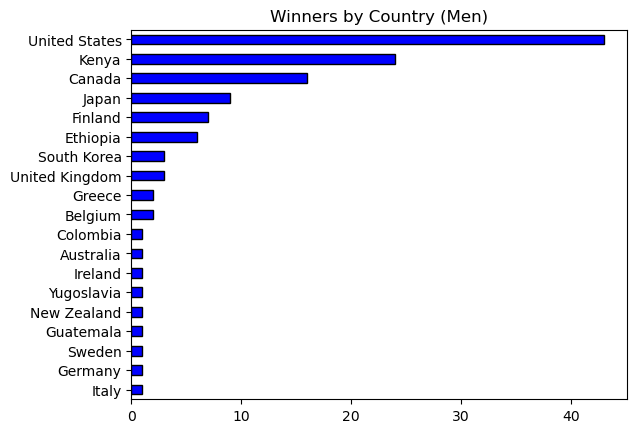

In [13]:
ax = data_m['Country'].value_counts().plot(kind='barh', edgecolor='black', color='blue', title='Winners by Country (Men)')
ax.invert_yaxis()

From the graph, it is easy to see that the majority of winners are from the United States. This is followed by Kenya, then Canada, Japan, and Finland.

Let's see if these results are similar for the women.

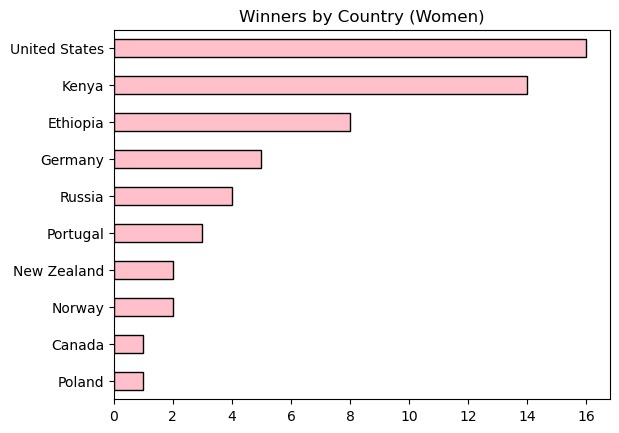

In [14]:
ax = data_f['Country'].value_counts().plot(kind='barh', edgecolor='black', color='pink', title='Winners by Country (Women)')
ax.invert_yaxis()

The first thing to notice is that there are less countries for women than for men. This is because there is less data available for the women: the data for men started in 1897, while the data for women started in 1966. As a result, there are less winners recorded for women than for men.

United States and Kenya are still first and second, similarly to men. However, there are no Japanese or Finnish winners, and only one winner from Canada. Another thing to notice is that there are almost as many Kenyan winners as American winners, whereas for men there was a much larger discrepancy.

A reason for this discrepancy could be that American, Finnish, Japanese, and Canadian winners were more common earlier since they were from more developed countries. It's possible that developing countries such as Kenya and Ethiopia have been winning more recently, which causes those countries to be more represented for the women as the data is skewed more recently.

Let's analyze the data further to confirm or deny this hypothesis. This can be done with a plot, although countries are not numeric.

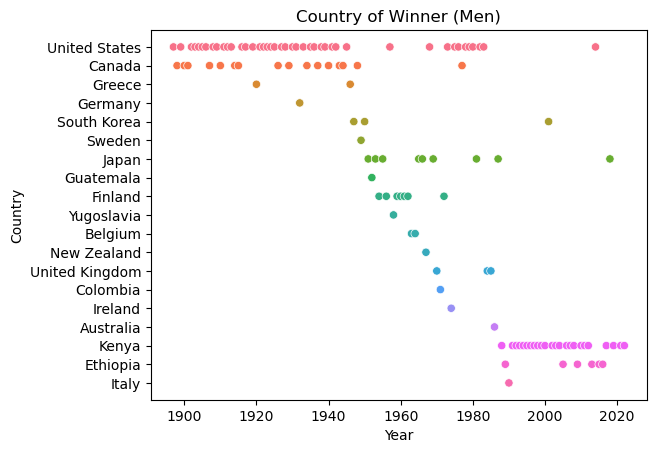

In [15]:
sns.scatterplot(data=data_m, x='Year', y='Country', hue='Country', legend=False)
plt.title('Country of Winner (Men)')
plt.show()

This plot is a great visualization of the winner each year. As hypothesized, countries such as Kenya and Ethiopia are winning much more recently than countries such as America and Canada.

Let's see a similar visualization for the women.

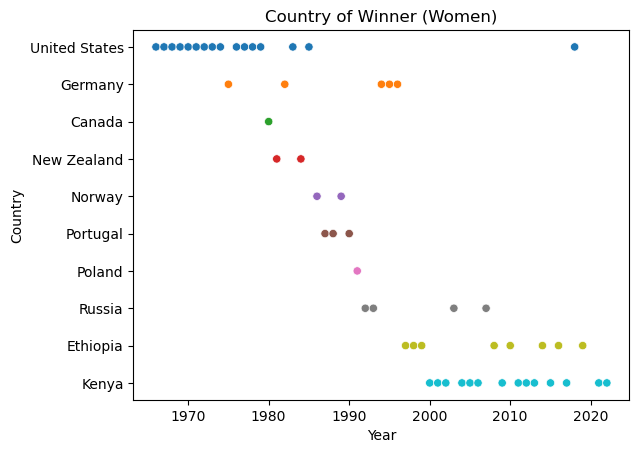

In [16]:
sns.scatterplot(data=data_f, x='Year', y='Country', hue='Country', legend=False)
plt.title('Country of Winner (Women)')
plt.show()

This plot confirms our hypothesis. Since the data for women is skewed to more recent years, developing countries represent a larger portion of the data.